# **Supermart Grocery Sales - Retail Analytics Dataset**

Example

what steps you should have to follow

Supermart Grocery Sales - Machine Learning Project
This project focuses on using a dataset containing information about grocery sales at
a supermarket.
 The dataset includes columns such as Order ID, Customer Name,
Category, Sub Category, City, Order Date, Region, Sales, Discount,
Profit, State, month_no, Month, and year. We’ll explore this data, perform
feature engineering, and build a machine learning model to predict sales or profit.


Step 1: Import Required Libraries

First, let's import the necessary libraries for data manipulation, visualization, and
machine learning.

Step 2: Load the Dataset

Assume we have a dataset named supermart_grocery_sales.csv. Let's load
the data into a pandas DataFrame.

Step 3: Data Preprocessing

1. Check for Missing Values and Handle Them

2. Convert Date Columns to DateTime Format

3. Label Encoding for Categorical Variables
Convert categorical variables such as Category, Sub Category, City, Region,
State, and Month into numerical values.


Step 4: Exploratory Data Analysis (EDA)

1. Distribution of Sales by Category

2. Sales Trends Over Time

3. Correlation Heatmap


Step 5: Feature Selection and Model Building

We’ll use features like Category, Sub Category, City, Region, State,
month_no, Discount, and Profit to predict Sales.


Step 6: Train a Linear Regression Model


Step 7: Evaluate the Model

Evaluate the model performance using Mean Squared Error (MSE) and R-squared.


Step 8: Visualize the Results

1. Actual vs Predicted Sales


Step 9: Conclusion

● The linear regression model provided a reasonable prediction for sales based
on the features selected.

● The model’s R-squared value indicates a good fit, explaining a significant
portion of the variance in sales.

● Further refinement of the model could involve trying different machine learning
algorithms, such as decision trees or ensemble methods.



Next Steps:

1. Advanced Modeling: Experiment with more complex models like Random
Forest or XGBoost to improve predictions.

2. Feature Engineering: Explore additional features or interactions between
features to enhance model performance.

3. Model Deployment: Integrate the model into a dashboard for real-time sales
prediction and business analytics.

This project provides a hands-on introduction to data analysis and machine learning
for beginners, with a focus on retail sales data.


In [79]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [80]:
#Step 2: #Load the DatasetAssume we have a dataset named supermart_grocery_sales.csv
#Let's load the data into a pandas DataFrame.
# Load the dataset

data=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [81]:
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [82]:
#Step 3: Data Preprocessing
#1. Check for Missing Values and Handle Them
# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)

# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [83]:
from datetime import datetime

date_str = "11-08-2017"
date_obj = datetime.strptime(date_str, "%d-%m-%Y")  # Correct format
print(date_obj)


2017-08-11 00:00:00


In [84]:
import pandas as pd

# Convert 'Order Date' to datetime format
#data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d-%m-%Y")  # Correct format

# Extract day, month, and year from 'Order Date'
#data['Order Day'] = data['Order Date'].dt.day
#data['Order Month'] = data['Order Date'].dt.month
#data['Order Year'] = data['Order Date'].dt.year


In [85]:
import pandas as pd

# Convert 'Order Date' to datetime format with automatic inference
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=False, errors='coerce')

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year


In [86]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Encode categorical variables
for col in ['Category', 'Sub Category', 'City', 'Region', 'State']:
    data[col] = le.fit_transform(data[col])

# Ensure 'Order Month' exists and handle missing values
if 'Order Month' in data.columns:
    data['Order Month'] = data['Order Month'].fillna(0).astype(int)  # Replace NaN with 0

# Display the first few rows after encoding
print(data.head())


print(data[data['Order Month'].isna()])


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0        8.0           11      2017.0  
1    749      0.18  149.80      0        8.0           11      2017.0  
2   2360      0.21  165.20      0       12.0            6      2017.0  
3    896      0.25   89.60      0       11.0           10      2016.0  
4   2355      0.26  918.45      0       11.0           10      2016.0  
Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sale

In [87]:
#3. Label Encoding for Categorical Variables
# Initialize the label encoder
#le = LabelEncoder()
# Encode categorical variables
#data['Category'] = le.fit_transform(data['Category'])
#data['Sub Category'] = le.fit_transform(data['Sub Category'])
#data['City'] = le.fit_transform(data['City'])
#data['Region'] = le.fit_transform(data['Region'])
#data['State'] = le.fit_transform(data['State'])
#data['Month'] = le.fit_transform(data['Month'])

# Display the first few rows after encoding
#print(data.head())

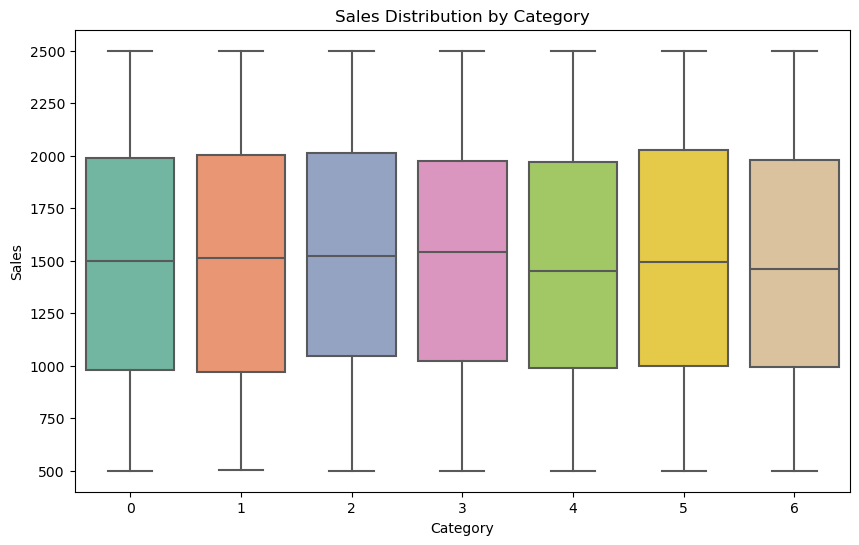

In [88]:
#Step 4: Exploratory Data Analysis (EDA)
#1. Distribution of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

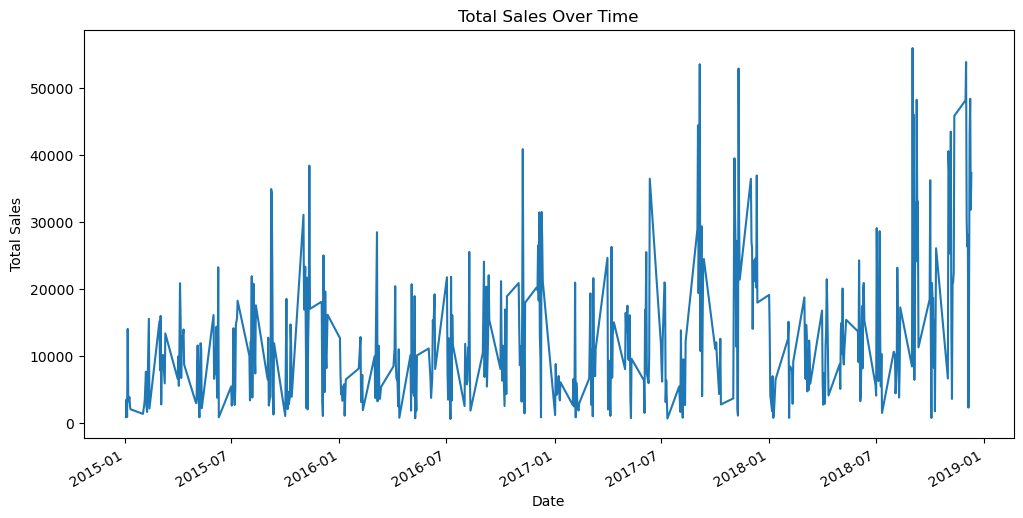

In [89]:
#2. Sales Trends Over Time
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

C:\Users\DELL\anaconda3\new\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


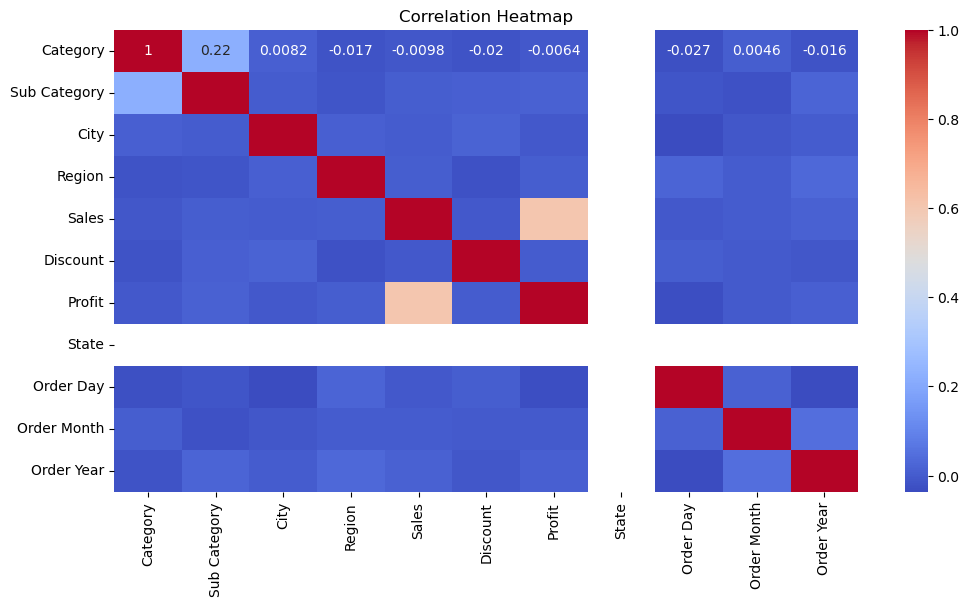

In [90]:
#3. Correlation Heatmap
plt.figure(figsize=(12, 6))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
corr_matrix = numerical_data.corr()  # Calculate correlation for numerical data
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [91]:
drop_cols = ['Order ID', 'Customer Name', 'Order Date', 'Sales']

# If 'Month' exists, remove it safely
if 'Month' in data.columns:
    drop_cols.append('Month')
elif 'Order Month' in data.columns:  # Use 'Order Month' instead
    drop_cols.append('Order Month')

# Drop only existing columns
features = data.drop(columns=drop_cols)
target = data['Sales']


In [92]:
print(data.columns)


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')


In [93]:
#Step 5: Feature Selection and Model Building
# Select features and target variable
#features = data.drop(columns=['Order ID', 'Customer Name','Order Date', 'Sales', 'Month'])
#target = data['Sales']


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [95]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(features.isna().sum())  # Check if any column has NaN values



Category           0
Sub Category       0
City               0
Region             0
Discount           0
Profit             0
State              0
Order Day       5952
Order Year      5952
dtype: int64


In [96]:
from sklearn.impute import SimpleImputer
#Step 6: Train a Linear Regression Model
# Initialize an imputer to fill missing values with the column mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to features
features_imputed = imputer.fit_transform(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [97]:


# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [98]:
#Step 7: Evaluate the Model
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212789.35402421313
R-squared: 0.35482522786432824


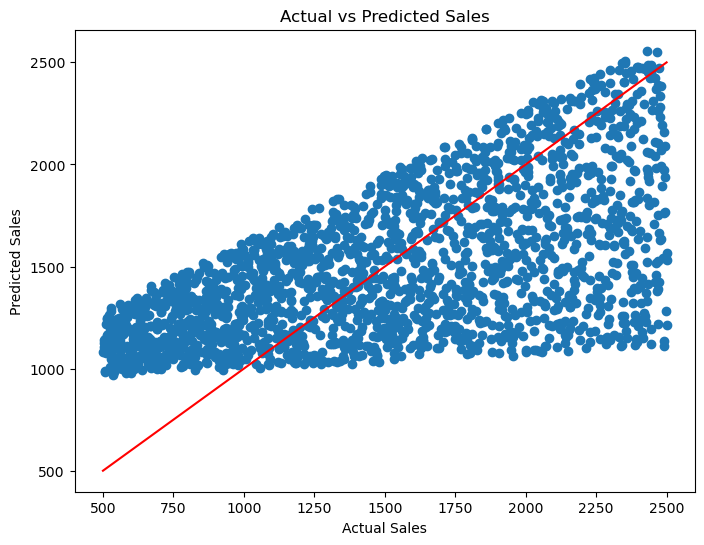

In [99]:
#Step 8: Visualize the Results
#1. Actual vs Predicted Sales

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [101]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [102]:
df.head(5)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [104]:
#Let's change the datatype of Order Date from object to date
df ['Order Date'] = pd.to_datetime (df ['Order Date'],errors='ignore')


In [105]:
#changed to date data type
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [106]:
# applying groupby() function to
# group the data on Category.
da=df.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu


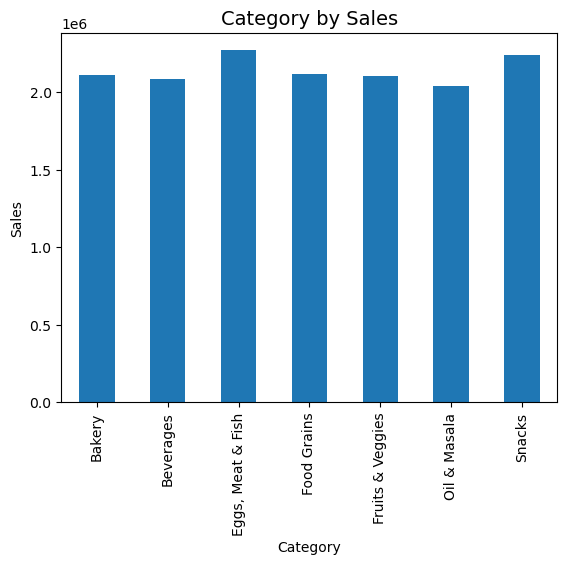

In [107]:
#we want to find the total sale by category
# firstly, we group by Category and get the total number of sales for each category
Sales_category=df.groupby("Category")["Sales"].sum()
#we create a plot of sales by category
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

The Egg, Meat &Fish Category contribute most to the sales, it had about 15% of
the total sales, the company can invest more in it.

In [111]:
#Extract month from the order date
#Extract month from the order date
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', errors='coerce')
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year
print(df[df['Order Date'].isna()])


Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State, month_no, Month, year]
Index: []


In [112]:
#check the data to view the added columns
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,month_no,Month,year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,November,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,November,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,June,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,October,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,October,2016


In [113]:
# Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

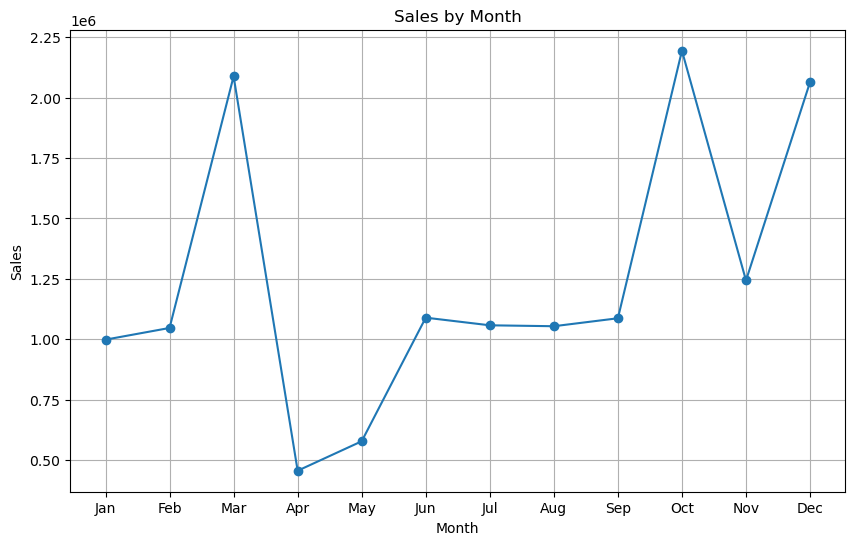

In [114]:
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The Sales increase as the month increases which shows the company devised
better and suitable plan to increase sales at each point in time.

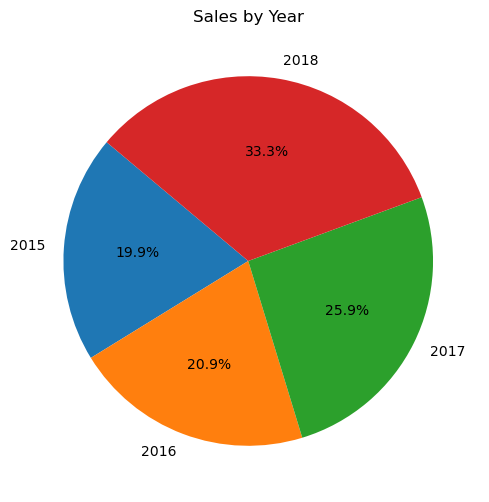

Empty DataFrame
Columns: [Order ID, Customer Name, Category, Sub Category, City, Order Date, Region, Sales, Discount, Profit, State, month_no, Month, year]
Index: []


In [117]:
import matplotlib.pyplot as plt

# Ensure 'year' exists and group sales by year
Yearly_Sales = df.groupby("year")["Sales"].sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Year')
plt.show()


print(df[df['Order Date'].isna()])  # Show rows with missing Order Date


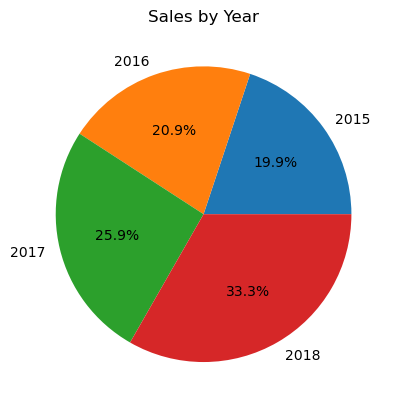

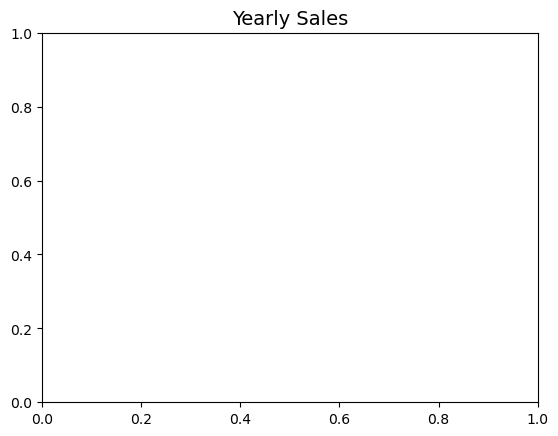

In [124]:
#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yearly_Sales=df.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
plt.title('Yearly Sales', fontsize = 14)
plt.show()

The year 2017 and 2018 had more than 50 percent of the total sales which
implies the sales increase as the year increases.

In [ ]:
#linkcode
# Step 1: Extract relevant columns
city_sales = df[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()